# Midterm project submission
Due April 4th (Sunday) 23:59pm.

You should address all the questions relevant to your project.
You will not be graded based on the values of the model performance, but on whether or not you have applied the right methodology: formulated the business model, translated it into a right machine learning approach, analyzed your data, prepared it for modelling, applied at least one machine learning approach, used cross validation for model tuning, evaluated your model using the relevant metrics.

If you have tried different approaches, please include them all, and not just the best one.
If doing some feature engineering or feature selection has improved your model, also please include all of the steps, not just the most sucessfull ones.

Here, fill out the student IDs:

#### Diogo Baltazar - 29134
    Fill in yours guys

## What business problem are you solving?
Please state clearly what business problem are you solving (one sentence). You may add a few sentences to explain why is this a relevant problem.


For our project we are going to try to predict if an individual will be accepted for a loan or not.

This is an extremely relevant problem specially for banks, as they have certain risk metrics that need to comply with on a daily nasis

In [65]:
import pandas as pd 
import numpy as np 
import scipy
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns

## What is the machine learning problem that you are solving?
Is it a classification problem or a regression problem? 
Is the goal to build a model that generates a ranked list, or is it to detect anomalies as new data come in? 
Are you doing clustering to find hidden patterns?
If applicable, what is your target?

### Classification problem, are we going to do clustering?

## Data exploration and preparation 

- How many data instances do you have?
- Do you have duplicates?
- How many features? What type are they?
- If they are categorical, what categories they have, what is their frequency?
- If they are numerical, what is their distribution?
- What is the distribution of the target variable?
- If you have a target, you can also check the relationship between the target and the variables.
- Do you have missing data? If yes, how are you going to handle it?
- Can you use the features in their original form, or do you need to alter them in some way?

If you have a lot of features, for midterm submission, you can choose to use only a subset.

In [66]:
df = pd.read_csv(r'bank_loans_100k.csv')
df.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,V0,12.004672,V2,V3,1069.707979,V0,V2,4,V2,V1,...,V2,30.587687,none,V1,1,V2,1,yes,yes,good
1,V3,49.594552,V2,V2,3363.626999,V0,V2,4,V2,V0,...,V2,27.943103,none,V1,1,V2,1,none,yes,good
2,V3,16.498608,V2,V3,8146.275518,V0,V1,1,V1,V0,...,V3,32.209940,none,V1,1,V2,1,none,yes,good
3,V1,9.031862,V1,V0,860.689994,V0,V4,4,V1,V0,...,V0,42.614952,none,V1,2,V1,1,yes,yes,good
4,V3,12.401648,V4,V2,1390.126876,V3,V4,1,V2,V0,...,V0,25.142543,none,V1,4,V2,1,none,yes,good


In [67]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,20.890539,3213.171968,2.955870,2.834780,35.608080,1.424040,1.158470
std,12.066117,2792.189516,1.121461,1.104171,11.246885,0.608057,0.365183
min,-0.367414,-5997.669542,1.000000,1.000000,17.463871,1.000000,1.000000
25%,11.964964,1389.439247,2.000000,2.000000,27.164384,1.000000,1.000000
50%,18.104977,2278.939296,3.000000,3.000000,33.115064,1.000000,1.000000
75%,24.926525,3823.169880,4.000000,4.000000,40.936065,2.000000,1.000000
max,73.201640,19664.977900,4.000000,4.000000,83.846943,4.000000,2.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   checking_status         100000 non-null  object 
 1   duration                100000 non-null  float64
 2   credit_history          100000 non-null  object 
 3   purpose                 100000 non-null  object 
 4   credit_amount           100000 non-null  float64
 5   savings_status          100000 non-null  object 
 6   employment              100000 non-null  object 
 7   installment_commitment  100000 non-null  int64  
 8   personal_status         100000 non-null  object 
 9   other_parties           100000 non-null  object 
 10  residence_since         100000 non-null  int64  
 11  property_magnitude      100000 non-null  object 
 12  age                     100000 non-null  float64
 13  other_payment_plans     100000 non-null  object 
 14  housing              

In [69]:
# Checking for duplciates; we dont have any

duplicateRowsDF = df[df.duplicated(keep='last')]
print(duplicateRowsDF)

Empty DataFrame
Columns: [checking_status, duration, credit_history, purpose, credit_amount, savings_status, employment, installment_commitment, personal_status, other_parties, residence_since, property_magnitude, age, other_payment_plans, housing, existing_credits, job, num_dependents, own_telephone, foreign_worker, class]
Index: []

[0 rows x 21 columns]


In [70]:
# Correlation matrix

df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)*100

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
checking_status,100.000000,-0.315866,0.026124,-0.658276,-0.308336,10.269887,0.701268,0.165921,-0.531563,0.869740,...,0.091119,-0.320528,-1.227087,-0.884572,-0.005859,0.043869,-0.575912,-0.092097,0.503044,-9.693609
duration,-0.315866,100.000000,0.461998,0.028042,99.702303,-0.065927,-0.241969,0.114824,-0.274239,0.524580,...,0.246534,99.562373,-0.173886,0.081469,0.296182,0.409985,-0.019076,-0.613331,0.282598,0.317903
credit_history,0.026124,0.461998,100.000000,-0.254972,0.460518,0.589277,-0.331057,0.012421,0.057709,0.359945,...,0.038365,0.468654,8.912637,-0.433073,45.061720,-0.415576,0.085066,0.037219,0.440537,-2.510933
purpose,-0.658276,0.028042,-0.254972,100.000000,0.034327,-1.143564,-0.587428,-0.733265,0.446451,-0.486711,...,-0.383853,0.022567,1.025296,0.958725,-0.311095,-0.163514,-0.071671,0.204768,0.105657,7.168168
credit_amount,-0.308336,99.702303,0.460518,0.034327,100.000000,-0.052062,-0.204488,0.099238,-0.292913,0.498096,...,0.291408,99.860565,-0.193338,0.035060,0.303052,0.432091,-0.026800,-0.637778,0.277708,0.273987
savings_status,10.269887,-0.065927,0.589277,-1.143564,-0.052062,100.000000,1.073918,0.291309,-1.142617,1.163377,...,0.865960,-0.057171,-1.372900,-1.905238,0.642661,-0.385102,0.258757,-0.692971,1.489895,-15.451010
employment,0.701268,-0.241969,-0.331057,-0.587428,-0.204488,1.073918,100.000000,0.146207,-0.576789,0.525980,...,0.162507,-0.197752,-0.785174,-0.868152,-0.028309,21.857004,0.350797,-8.706735,-0.353094,-4.921804
installment_commitment,0.165921,0.114824,0.012421,-0.733265,0.099238,0.291309,0.146207,100.000000,-0.286321,0.618412,...,-2.664276,0.096129,-1.069865,2.253995,0.485972,0.046987,0.242927,0.548746,0.346186,-3.062280
personal_status,-0.531563,-0.274239,0.057709,0.446451,-0.292913,-1.142617,-0.576789,-0.286321,100.000000,-0.819065,...,-0.686878,-0.278128,1.178073,0.908396,0.023802,0.927778,-22.066250,0.403166,0.053260,7.140341
other_parties,0.869740,0.524580,0.359945,-0.486711,0.498096,1.163377,0.525980,0.618412,-0.819065,100.000000,...,5.371778,0.515075,-0.738303,-4.149279,-0.014952,-0.357762,0.321177,0.208117,0.481280,-7.567453


In [71]:
print(df.isna().sum())

print("We dont have any missing vlaues as well")

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64
We dont have any missing vlaues as well


### We have 21 features, where most of them are string type and then
    Duration, credit_amount, installment_commitment, residence_since, age, existing_credits, num_dependents are either ints or floats

#### Our categorical variables include: 
    Checking_status, credit_history, purpose, saving_status, employment, personal status, other_parties, property_magnitude
    other_payment_loans, housing, job, own_telephone, foreign_worker

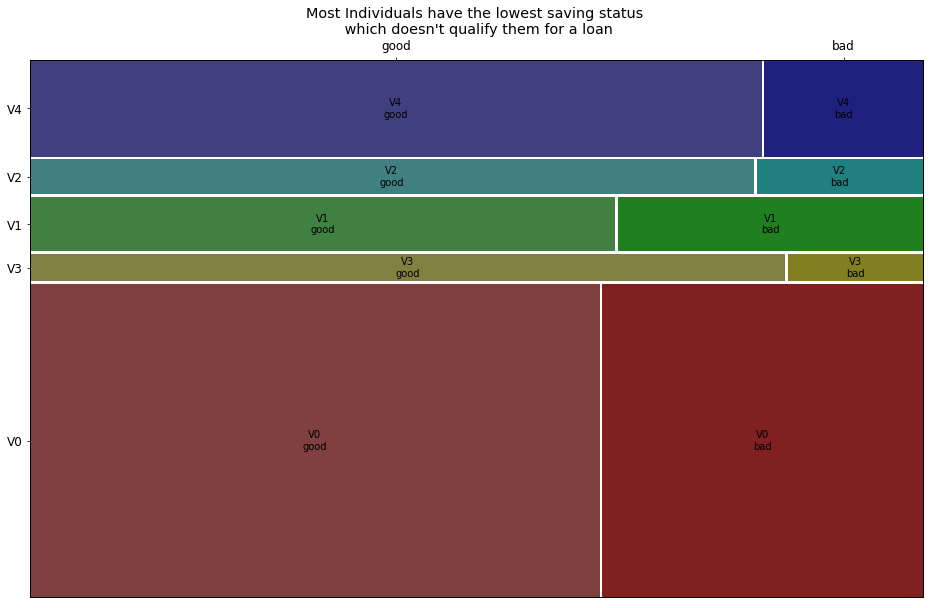

In [72]:
# importing a mosaic library from stats models
from statsmodels.graphics.mosaicplot import mosaic
fig, ax = plt.subplots(figsize=(16,16*0.618))
plt.rcParams["font.size"] = 12
plt.rcParams["text.color"] = "k"
mosaic(df, ['savings_status', 'class'], horizontal=False, ax=ax)
plt.title("Most Individuals have the lowest saving status \n which doesn't qualify them for a loan", {"color":"k"});

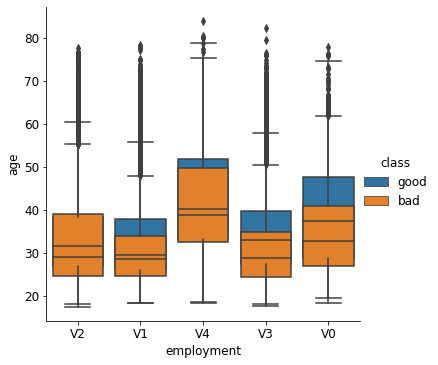

In [73]:
sns.catplot(x="employment", y="age", hue="class",
            kind="box", dodge=False, data=df)

Text(0.5, 1.0, 'V3 is the most common')

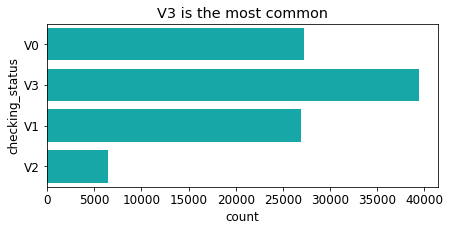

In [74]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="checking_status", data=df, color="c").set_title('V3 is the most common')

In [75]:
# ax = sns.violinplot(x="employment", y="credit_amount", hue="class",
#                     data=df, palette="Set2", split=True,
#                     scale="count", inner="stick")

### Our target variable I believe is the class
    which follows a binomial distribution

## Feature engineering
Creating good features is probably the most important step in the machine learning process. 
This might involve doing:
- transformations
- aggregating over data points or over time and space, or finding differences (for example: differences between two monthly bills, time difference between two contacts with the client) 
- creating dummy (binary) variables
- discretization. 

Business insight is very relevant in this process.

For projects where some features are anonymized, not a lot can be done here, except preparing the format of the variables to be suitable for the selected model.


## Modeling
You should implemente AT LEAST ONE approach we covered so far, and tune of at least one hyperparameter.
Do not forget that you should split your data into train and test set.
You should do model selection and tuning using cross validation on the train set.
Explain and justify what is the metric you are using for model selection and tuning.

## Model evaluation

After selecting and tuning your model on the train set, you should evaluate its performance on the test set. 
You might have tuned your model using a certain metric, but now you should describe the model performance using all relevant metrics. 
If you have some business insight, why a certain metric is relevant, you should explain it. 
For example in disease detection, you might not want to have a false positive rate higher than some threshold (say 5%).

If you preformed clustering, you should describe and visualize your clusters.

## Next steps

If you already have an idea what are the next steps for your project, please describe them.
This part is not graded, but can help us give you feedback.